# Lab Notebook 3 - kNN algorithm

In this exercise, we will code a kNN algorithm from scratch, and then compare its performance to a pre-written routine.

# Part 1: Organize data

Import numpy, matplotlib, matplotlib.pyplot, matplotlib.patches, pandas, sklearn, and neighbors and metrics from sklearn. Set the rc parameters that you'd like to use for all your figures.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.preprocessing import StandardScaler
from collections import Counter


plt.rc('font', size=15)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=16)
plt.rc('figure',figsize=(8,6))

## Step 1.2

Our learning set 'HPLearningSet.csv' comes in csv (comma separated values) format and that is most conveniently read using the pandas library.

Read it to the data frame "LearningSet". Since the first column is just an index, drop it using LearningSet.drop. You will need to specify the column to be dropped and the axis.

Visually inspect the learnign set by printing it.

In [13]:
# Import csv with panda
LearningSet = pd.read_csv('HPLearningSet.csv')

# Drop Column 1
LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1)

print(LearningSet)

                P_NAME  S_MASS     P_PERIOD  P_DISTANCE  P_HABITABLE
0         Kepler-736 b    0.86     3.601472    0.043718            0
1         Kepler-636 b    0.85    16.080661    0.118082            0
2         Kepler-887 c    1.19     7.638460    0.080420            0
3         Kepler-442 b    0.61   112.305300    0.409327            1
4         Kepler-772 b    0.98    12.992073    0.107408            0
5   Teegarden's Star b    0.09     4.910000    0.025200            1
6             K2-116 b    0.69     4.655411    0.048086            0
7            GJ 1061 c    0.12     6.689000    0.035000            1
8           HD 68402 b    1.12  1103.000000    2.180981            0
9        Kepler-1544 b    0.81   168.811170    0.557107            1
10        Kepler-296 e    0.50    34.142110    0.178202            1
11        Kepler-705 b    0.53    56.056054    0.231926            1
12        Kepler-445 c    0.18     4.871229    0.031746            0
13         HD 104067 b    0.62    

## Step 1.3

Use the first 13 data entries as the training set, and the following 5 entries as the test set. To do so, use "iloc":

Define "Xtrain" and "Xtest". They contain the stellar mass, period, and distance of each data point in the training set and test set, respectively.

Define "ytrain" and "ytest". They should only contain the P_HABITABLE information.

In [14]:
Xtrain = LearningSet.iloc[:13,1:4]
Xtest = LearningSet.iloc[13:,1:4]

ytrain = LearningSet.iloc[:13,4]
ytest = LearningSet.iloc[13:,4]


# Part 2: Use the kNN algorithm from sklearn

## Step 2.1: Train and classify

Define a model by using the KNeighborsClassifier with 3 neighbors. For the moment we're only going to use 2 features from the data set to build this model, so use iloc from pandas to remove all features *besides* S_MASS and P_PERIOD.

First, train the model, predict the "Habitable" label for the test set and compare the prediction to the actual labels. Are the predicted values correct?

We can also look at the accuracy of the prediction. Use metrics.accuracy_score...

1) ... between the y training values and the model's y prediction using the x training values

2) ... between the y testing values and the model's y prediction using the x testing values

In [15]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# Drop all features besides S_MASS and P_PERIOD
Xtrain_2 = Xtrain.iloc[:,:2]
Xtest_2 = Xtest.iloc[:,:2]

# Fit the model
model.fit(Xtrain_2, ytrain)

# Predict 'Habitable'
y_pred_test_kNN = model.predict(Xtest_2)
y_pred_train_kNN = model.predict(Xtrain_2)

print("Prediction:", y_pred_test_kNN)
print("Actual:" ,list(ytest)) 
print("Almost correct, only the first value differs")

# Accuracy Determination
from sklearn.metrics import accuracy_score

test_score = accuracy_score(ytest,y_pred_test_kNN)
print("Test score:",test_score)

train_score = accuracy_score(ytrain,y_pred_train_kNN)
print("Train score:",train_score)

Prediction: [1 0 1 0 1]
Actual: [0, 0, 1, 0, 1]
Almost correct, only the first value differs
Test score: 0.8
Train score: 0.6923076923076923


## Step 2.2: Visualize the results

With just two features, it is possible to visualize the data set in two dimensions. scikit learn has a useful routine called "DecisionBoundaryDisplay", which plots the separation between the two classes in the dataset. 

Import this function from sklearn.inspection use the "from_estimator" method to plot the decision boundary for your kNN classifier. . Then add a scatter plot of your dataset and assign a different colour to each of your two classes and a different symbol for test and train set. Make sure to add a legend.

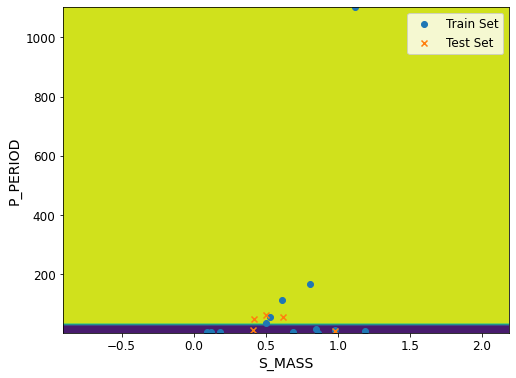

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(model, Xtrain_2, response_method="predict")

# Create scatter plots
plt.scatter(Xtrain_2.iloc[:, 0], Xtrain_2.iloc[:, 1], marker='o', label='Train Set')
plt.scatter(Xtest_2.iloc[:, 0], Xtest_2.iloc[:, 1], marker='x', label='Test Set')

plt.legend()
plt.show()

#### The period is ~2 orders of magnitude greater than the mass, take the log to see the changes clearer

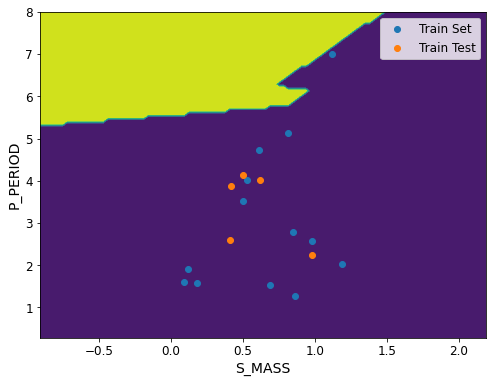

In [17]:
X_train_red_log=Xtrain_2.copy()
X_test_red_log=Xtest_2.copy()
X_train_red_log.values[:,1]=np.log(X_train_red_log.values[:,1])
X_test_red_log.values[:,1]=np.log(X_test_red_log.values[:,1])
DBD=DecisionBoundaryDisplay.from_estimator(model,X_train_red_log,response_method='predict')
plt.scatter(X_train_red_log.values[:,0],X_train_red_log.values[:,1],label='Train Set')
plt.scatter(X_test_red_log.values[:,0],X_test_red_log.values[:,1],label='Train Test')
plt.legend()
plt.show()

# Part 3: Write your own kNN algorithm

## Step 3.1

1) Import StandardScaler from sklearn. StandardScalar standardizes features by removing the mean and scaling to unit variance. 

2) Next, we will pre-process the data. Define a model ("own_model") by running StandardScaler().fit on the x training data. Use "transform" on both the x training data and x testing data to change the format into a numpy array.


In [18]:
scaler = StandardScaler()
own_model = scaler.fit(Xtrain_2)

Xtrain_2_scaled = own_model.transform(Xtrain_2)
Xtest_2_scaled = own_model.transform(Xtest_2)

## Step 3.2

Define two functions:

1) Define the function "most_common", which takes "data" as input. It returns the most common value in a list of values given by "data".
2) Define the function "euclidean", which takes "point" and "data" as input. It returns the euclidean distance between "point" and all components of "data".

In [19]:
def most_common(data):
    counter = Counter(data)
    most_common_value = counter.most_common(1)[0][0]
    return most_common_value

def euclidean(point,data):
    return np.sqrt(np.sum((data-point)**2))

## Step 3.3

What comes next is that we're going to iterate over each possible value of *k* in the array of *k*'s. For each value of k, we will create a kNN classifier, fit it with the training data, and evaluate it on the test data. We will then check the accuracy of our model.

1) First, define a class called "KNeighborsClassifier". 

2) Within KNeighborsClassifier, define the constructor "**\_\_init__**". (\_\_init__ must be called when a new instance of a class is created. It allows you to initialize the variables of an object.) It takes as arguements: self, k, and dist_metric. Set the default value of k to be 5, and the default value of dist_metric to be euclidean. 

3) Within **\_\_init__**, let self.k = k and self.dist_metric = dist_metric.

The class KNeighborsClassifier will contain 3 other "class methods": fit, predict, and evaluate.

4) Define the method "**fit**". Let it take self, Xtrain, and ytrain as inputs. Within fit, let self.Xtrain = Xtrain and self.ytrain = ytrain.

5) Define the method "**predict**". Let it take self and Xtest as inputs. 

This method is the core part of the class, the part that actually does the kNN computation. Within predict, first initialize an empty list called "neighbours". Then implement the pseudocode of kNN:

for all test partices:
    
    compute all distances between test and training particles using the previously defined distance metric function
    
    sort the list of distances and from that list create a sorted list of target labels. There are several possibilities to code this, no need to look for the most efficient one.
    
    out of this sorted target list, select the top k entries and append to the list "neighbours"
    
    after you have created this list of neighbors for all test particles, use the previously defined function "most_common" to determine the classification label for the test particles, and make predict return that list. The python "map" construct lets you apply a function to a list of arguments.


6) Define the method "**evaluate**". Let it take as input: self, Xtest, and ytest. Within evaluate, let y_pred (the predicted y values) be the result of running self.predict on Xtest. Define "accuracy" as the sum of y_pred being equal to ytest (hint: use the equality operator, ==), and this sum is divided by the number of ytest values. Return the accuracy.

In [20]:
class KNeighborsClassifier:
    
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, Xtrain, ytrain):
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        
    def predict(self, Xtest):
        
        neighbours = []
        for test_point in Xtest:

            distances = [self.dist_metric(test_point, train_point) for train_point in self.Xtrain]
            
            sort = sorted(zip(distances, self.ytrain))
            sort_labels = np.array(sort)[:,1]
            top_k = sort_labels[:self.k]
            neighbours.append(top_k)
            
        pred = list(map(most_common, neighbours))
   
        return pred
    
    def evaluate(self, Xtest, ytest):
        y_pred = self.predict(Xtest)
        accuracy = np.sum(y_pred == ytest)/len(ytest)
        return accuracy           
            

## Step 3.4

We don't know how many nearest neighbours are ideal to use for our data set. Therefore, we will try with an unknown integer *k* of nearest neighbours. Define an array of *k*'s ranging from 1 to 13 (there cannot be more neighbors than instances in the training set. Why?).

Now let's test our model for each value of k.

Within this loop, let knn be the result of calling KNeighborsClassifier with k equals the current k-value. Next, run "fit" on knn, using the x and y training data.

As in step 2.1 compare the predicted labels to the actual labels by printing them side by side for each value of k

Compute the accuracy as the result of calling knn.evaluate using the x and y test data as input and append the result to a list "accuracies" that you initialized as an empty list beforehand.

For the same values of k, perform the classification with the sklean provided classifier that you used in part 2, and also record the accuracies in a separate array "accuracies_sklearn".

#### There can't be more neighbors than instances otherwise there wont be enough neighbors

In [21]:
k_values = np.arange(1,14)

accuracies = []
accuracies_sklearn = []

for i in k_values:
    
    # My own model
    knn = KNeighborsClassifier(k=i)
    knn.fit(Xtrain_2_scaled,ytrain)
    
    y_pred_class = knn.predict(Xtest_2_scaled)
    print("k=",i,"Actual:",np.array(ytest), "Predicted:",y_pred_class )
    
    accuracies.append(knn.evaluate(Xtest_2_scaled,ytest))
    
    # Sklearn
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(Xtrain_2_scaled, ytrain)
    y_pred_sk = model.predict(Xtest_2_scaled)
    test_score = accuracy_score(ytest,y_pred_sk)
    
    accuracies_sklearn.append(test_score)  
  

k= 1 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 2 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 3 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 4 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 5 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 6 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 7 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 8 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 9 Actual: [0 0 1 0 1] Predicted: [0.0, 1.0, 1.0, 0.0, 1.0]
k= 10 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 11 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 12 Actual: [0 0 1 0 1] Predicted: [1.0, 1.0, 1.0, 0.0, 1.0]
k= 13 Actual: [0 0 1 0 1] Predicted: [0.0, 0.0, 0.0, 0.0, 0.0]


## Step 3.5

Finally, we're going to visualize the performance of our kNN algorithm. Plot the values of k on the x-axis and the accuracies for both your own code and the one from sklearn on the y-axis. Add a descriptive title. Save and show the figure. Does the two codes agree? What value(s) of k are best and what is the maximum accuracy achieved? 

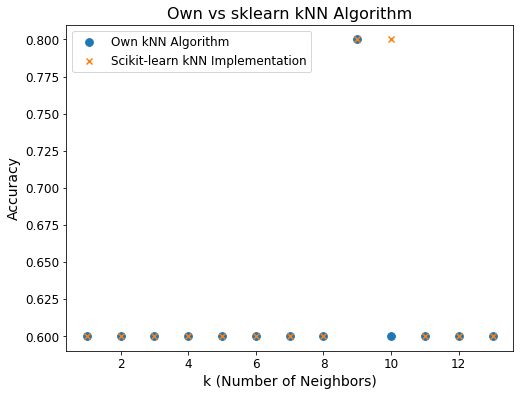

In [22]:
plt.scatter(k_values, accuracies, marker='o',s=60, label='Own kNN Algorithm')
plt.scatter(k_values, accuracies_sklearn, marker='x', label='Scikit-learn kNN Implementation')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Own vs sklearn kNN Algorithm')
plt.legend()

#plt.savefig('knn_comparison.png') #-> to save the plot
plt.show()

##### The two codes mostly agree, except for only at k=10. The values of k that are best are 1-8, and 11,12 with the maximum accuracy standing at 0.6.